Gradient Boosting is a powerful ensemble machine learning technique used for regression and classification tasks. It builds models sequentially, with each model attempting to correct the errors made by the previous ones. Here, we will delve into the details and calculations involved in Gradient Boosting.

### Overview of Gradient Boosting

1. **Initialization**: Start with an initial prediction, typically the mean of the target values in the case of regression.

2. **Iteration**: For a fixed number of iterations (or until convergence):
   - Compute the residuals (errors) between the actual target values and the current predictions.
   - Fit a new model (typically a weak learner like a decision tree) to these residuals.
   - Update the predictions by adding the predictions of the new model, scaled by a learning rate.

3. **Final Model**: The final model is a weighted sum of all the weak learners.

### Detailed Steps and Calculations

#### Step 1: Initialization

- Let \(\hat{y}_i^{(0)}\) be the initial prediction for the \(i\)-th sample. For regression, this is often the mean of the target values \(y_i\):

\$ \hat{y}_i^{(0)} = \frac{1}{N} \sum_{i=1}^{N} y_i \$

#### Step 2: Iterative Fitting

For \(m = 1\) to \(M\) (number of boosting rounds):

1. **Compute Residuals**: Calculate the residuals (errors) for each sample:

\$ r_i^{(m)} = y_i - \hat{y}_i^{(m-1)} \$

2. **Fit a Weak Learner**: Fit a weak learner (e.g., decision tree) to the residuals. Let \(h^{(m)}(x_i)\) be the prediction of the \(m\)-th weak learner.

3. **Update Predictions**: Update the predictions with the new weak learner scaled by a learning rate \(\eta\):

\$ \hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta \cdot h^{(m)}(x_i) \$

#### Step 3: Final Prediction

After \(M\) iterations, the final prediction is:

\$ \hat{y}_i = \hat{y}_i^{(M)} = \sum_{m=1}^{M} \eta \cdot h^{(m)}(x_i) \$

### Example Calculation

Let's illustrate this with a simple example:

Suppose we have a dataset with 4 samples:

| \(x_i\) | \(y_i\) |
|--------|---------|
| 1      | 2       |
| 2      | 3       |
| 3      | 4       |
| 4      | 5       |

1. **Initialization**:
   \(\hat{y}_i^{(0)} = \frac{1}{4} (2 + 3 + 4 + 5) = 3.5\)

   Initial predictions: \($3.5, 3.5, 3.5, 3.5$\)

2. **Iteration 1**:
   - Residuals: \($2 - 3.5, 3 - 3.5, 4 - 3.5, 5 - 3.5$ = $-1.5, -0.5, 0.5, 1.5$\)
   - Fit a weak learner (e.g., a simple decision tree) to the residuals. Suppose the tree learns a simple model \(h^{(1)}(x) = x - 2.5\).
   - Update predictions with learning rate \(\eta = 0.1\):

   \$
   \hat{y}_i^{(1)} = \hat{y}_i^{(0)} + 0.1 \cdot h^{(1)}(x_i)
   \$

   \$
   \hat{y}_i^{(1)} = 3.5 + 0.1 \cdot (x_i - 2.5)
   \$

   Updated predictions: \($3.35, 3.45, 3.55, 3.65$\)

3. **Iteration 2**:
   - Residuals: \($2 - 3.35, 3 - 3.45, 4 - 3.55, 5 - 3.65$ = $-1.35, -0.45, 0.45, 1.35$\)
   - Fit another weak learner to the new residuals. Suppose this model learns \(h^{(2)}(x) = x - 2.5\) again.
   - Update predictions:

   \$
   \hat{y}_i^{(2)} = \hat{y}_i^{(1)} + 0.1 \cdot h^{(2)}(x_i)
   \$

   \$
   \hat{y}_i^{(2)} = 3.35 + 0.1 \cdot (x_i - 2.5)
   \$

   Updated predictions: \($3.215, 3.405, 3.595, 3.785$\)

Continue this process for more iterations.

### Key Points

- **Learning Rate (\(\eta\))**: Controls the contribution of each weak learner. Smaller values lead to more robust models but require more iterations.
- **Weak Learner**: Typically, decision trees with a limited depth are used to ensure they are weak learners.
- **Regularization**: Techniques like shrinkage (using a learning rate), subsampling, and limiting the depth of trees help in preventing overfitting.

Gradient Boosting can be used for both regression and classification problems. For classification, the procedure involves minimizing a suitable loss function (like log-loss for binary classification) instead of residuals directly.

In practice, libraries like XGBoost, LightGBM, and CatBoost provide efficient implementations of gradient boosting with additional features like regularization and parallelization.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate Sample Data

In [9]:
## Generate some random data for illustration
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2*X
y

array([[ 0.        ],
       [ 0.2020202 ],
       [ 0.4040404 ],
       [ 0.60606061],
       [ 0.80808081],
       [ 1.01010101],
       [ 1.21212121],
       [ 1.41414141],
       [ 1.61616162],
       [ 1.81818182],
       [ 2.02020202],
       [ 2.22222222],
       [ 2.42424242],
       [ 2.62626263],
       [ 2.82828283],
       [ 3.03030303],
       [ 3.23232323],
       [ 3.43434343],
       [ 3.63636364],
       [ 3.83838384],
       [ 4.04040404],
       [ 4.24242424],
       [ 4.44444444],
       [ 4.64646465],
       [ 4.84848485],
       [ 5.05050505],
       [ 5.25252525],
       [ 5.45454545],
       [ 5.65656566],
       [ 5.85858586],
       [ 6.06060606],
       [ 6.26262626],
       [ 6.46464646],
       [ 6.66666667],
       [ 6.86868687],
       [ 7.07070707],
       [ 7.27272727],
       [ 7.47474747],
       [ 7.67676768],
       [ 7.87878788],
       [ 8.08080808],
       [ 8.28282828],
       [ 8.48484848],
       [ 8.68686869],
       [ 8.88888889],
       [ 9

# Step 2: Fit Gradient Boosting Regressor

In [10]:
# Create and train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [11]:
# Make predictions
y_pred = gbr.predict(X)

# Step 3: Evaluate the Model

In [12]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y, y_pred)
print(f"R Squared Error: {r2}")

Mean Squared Error: 8.328297742303162e-05
R Squared Error: 0.9999975509857134


# Step 4: Visualization

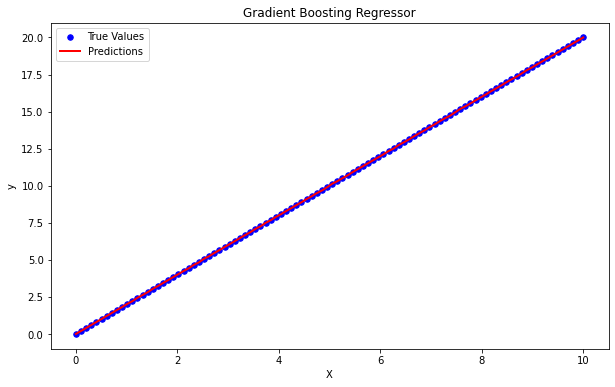

In [13]:
# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='True Values', color='b', s=30)
plt.plot(X, y_pred, label='Predictions', color='r', linewidth=2)
plt.title("Gradient Boosting Regressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()